In [1]:
import csv
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go2
import math
import zipfile
import pandas as pd
import statistics
from statistics import mean
from sklearn import feature_selection as fs
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# col_2, col_13, col_17, col_20 are categorical variables.

In [2]:
df = pd.read_csv("train_precessed.csv")
df_test = pd.read_csv("test_precessed.csv")

In [3]:
df

,col_1,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,...,col_18,col_19,col_21,col_13_1,col_13_2,col_13_3,col_17_1,col_17_2,col_20_3.0,CreditScore
0,22,8557.39,797.115833,8,6,22,2,37,15.0,7.64,...,13.168404,91.952879,264.590301,0.0,0.0,0.0,0.0,1.0,1.0,2
1,37,19718.92,1676.243333,10,9,19,6,27,11.0,13.02,...,64.066440,107.668408,285.889485,0.0,1.0,0.0,0.0,1.0,1.0,2
2,33,32045.78,2677.481667,6,9,30,7,10,10.0,17.19,...,169.770374,62.681178,285.296615,0.0,1.0,0.0,0.0,1.0,0.0,2
3,42,62976.28,5321.023333,0,3,12,0,9,0.0,6.05,...,0.000000,70.780837,711.321496,1.0,0.0,0.0,1.0,0.0,0.0,1
4,39,57818.72,4864.226667,7,7,21,2,56,16.0,4.09,...,73.709570,395.136222,307.576874,0.0,0.0,0.0,0.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85264,41,9795.07,586.255833,7,8,29,6,62,19.0,4.01,...,42.605317,43.529548,242.490718,0.0,0.0,0.0,0.0,1.0,0.0,2
85266,46,110607.09,8997.257500,4,4,2,3,2,9.0,4.26,...,154.824136,232.178801,752.722813,1.0,0.0,0.0,1.0,0.0,0.0,0
85267,50,96275.84,8101.986667,6,6,19,1,7,18.0,2.94,...,64.961337,129.831967,855.405363,0.0,1.0,0.0,0.0,0.0,1.0,0
85268,55,69388.26,5543.355000,2,4,6,0,8,1.0,14.16,...,0.000000,184.212607,640.122893,1.0,0.0,0.0,1.0,0.0,0.0,2


In [4]:
df.isnull().sum()

col_1          0
col_3          0
col_4          0
col_5          0
col_6          0
col_7          0
col_8          0
col_9          0
col_10         0
col_11         0
col_12         0
col_14         0
col_15         0
col_16         0
col_18         0
col_19         0
col_21         0
col_13_1       0
col_13_2       0
col_13_3       0
col_17_1       0
col_17_2       0
col_20_3.0     0
CreditScore    0
dtype: int64

feature

In [5]:
data_num = df.iloc[:,:17]

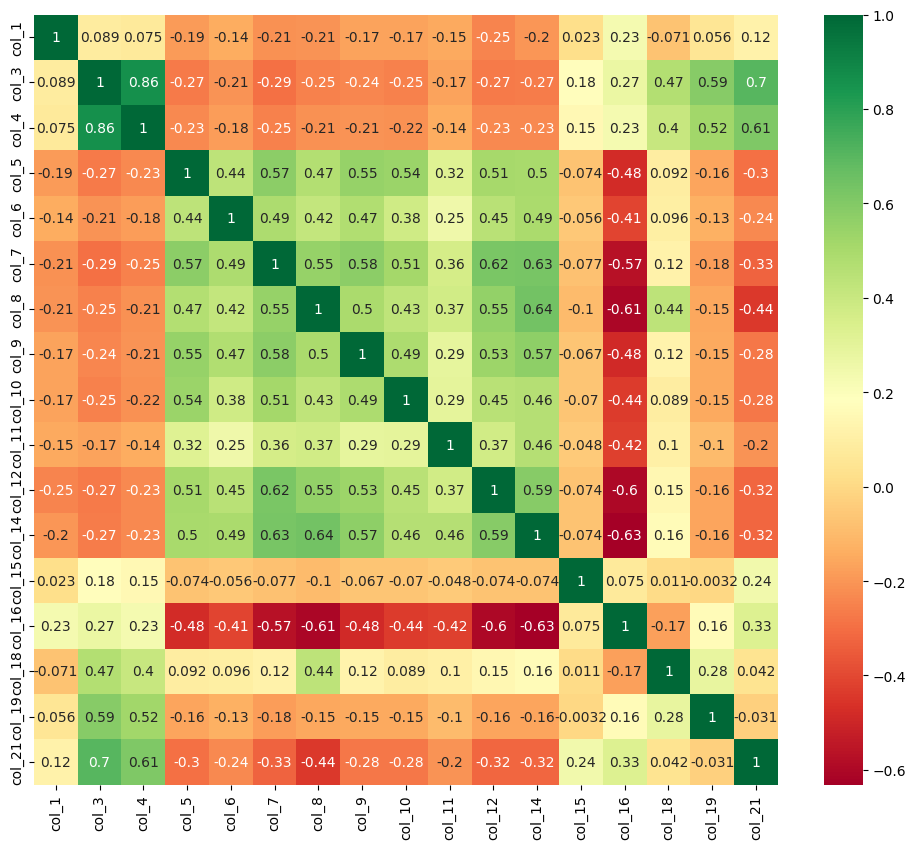

In [6]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data_num.corr(), annot=True,cmap ='RdYlGn') 

feature down

In [7]:
df_label = df['CreditScore']
df_data = df.drop('CreditScore', axis=1) 
df_data

,col_1,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,...,col_16,col_18,col_19,col_21,col_13_1,col_13_2,col_13_3,col_17_1,col_17_2,col_20_3.0
0,22,8557.39,797.115833,8,6,22,2,37,15.0,7.64,...,143,13.168404,91.952879,264.590301,0.0,0.0,0.0,0.0,1.0,1.0
1,37,19718.92,1676.243333,10,9,19,6,27,11.0,13.02,...,197,64.066440,107.668408,285.889485,0.0,1.0,0.0,0.0,1.0,1.0
2,33,32045.78,2677.481667,6,9,30,7,10,10.0,17.19,...,76,169.770374,62.681178,285.296615,0.0,1.0,0.0,0.0,1.0,0.0
3,42,62976.28,5321.023333,0,3,12,0,9,0.0,6.05,...,191,0.000000,70.780837,711.321496,1.0,0.0,0.0,1.0,0.0,0.0
4,39,57818.72,4864.226667,7,7,21,2,56,16.0,4.09,...,174,73.709570,395.136222,307.576874,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85264,41,9795.07,586.255833,7,8,29,6,62,19.0,4.01,...,67,42.605317,43.529548,242.490718,0.0,0.0,0.0,0.0,1.0,0.0
85266,46,110607.09,8997.257500,4,4,2,3,2,9.0,4.26,...,265,154.824136,232.178801,752.722813,1.0,0.0,0.0,1.0,0.0,0.0
85267,50,96275.84,8101.986667,6,6,19,1,7,18.0,2.94,...,321,64.961337,129.831967,855.405363,0.0,1.0,0.0,0.0,0.0,1.0
85268,55,69388.26,5543.355000,2,4,6,0,8,1.0,14.16,...,266,0.000000,184.212607,640.122893,1.0,0.0,0.0,1.0,0.0,0.0


In [8]:
from sklearn.ensemble import RandomForestClassifier
xtrain , xtest , ytrain , ytest = train_test_split(df_data,df_label,test_size=0.2,random_state=0)

In [9]:
model_rf = RandomForestClassifier(n_estimators=200)
model_rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [10]:
evaluation = model_rf.score(xtest,ytest)

In [11]:
evaluation

0.7867536377320622

In [12]:
df_test.isnull().sum()

col_1         0
col_3         0
col_4         0
col_5         0
col_6         0
col_7         0
col_8         0
col_9         0
col_10        0
col_11        0
col_12        0
col_14        0
col_15        0
col_16        0
col_18        0
col_19        0
col_21        0
col_13_1      0
col_13_2      0
col_13_3      0
col_17_1      0
col_17_2      0
col_20_3.0    0
dtype: int64

In [13]:
df_test.isnull().sum()

col_1         0
col_3         0
col_4         0
col_5         0
col_6         0
col_7         0
col_8         0
col_9         0
col_10        0
col_11        0
col_12        0
col_14        0
col_15        0
col_16        0
col_18        0
col_19        0
col_21        0
col_13_1      0
col_13_2      0
col_13_3      0
col_17_1      0
col_17_2      0
col_20_3.0    0
dtype: int64

In [14]:
outcome = model_rf.predict(df_test)
outcome_df = pd.DataFrame(outcome)
outcome_df1 = outcome_df.set_axis(["Label"], axis="columns")
outcome_df1.head()


,Label
0,2
1,0
2,2
3,0
4,0


In [15]:
outcome_df1.to_csv('ans1.csv',index_label='Id')